In [1]:
# to avoid warnings
from transformers.utils import logging
logging.set_verbosity_error()

In [2]:
from transformers import pipeline

#object detection

od_pipe = pipeline(task = "object-detection", model = "facebook/detr-resnet-50")

print(f"object detection pipeline is: {od_pipe} in memory address.")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


object detection pipeline is: <transformers.pipelines.object_detection.ObjectDetectionPipeline object at 0x104627750> in memory address.


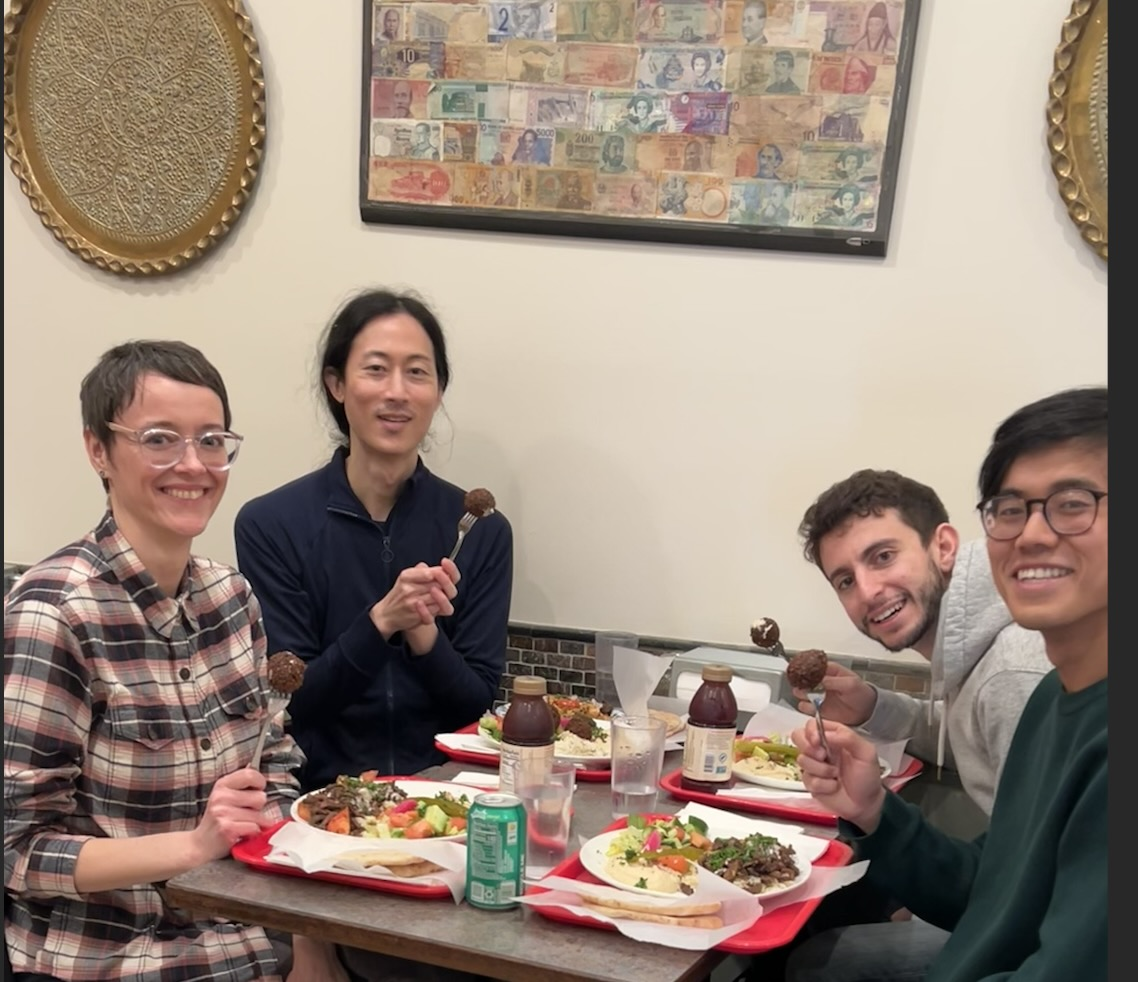

In [3]:
from PIL import Image
raw_image = Image.open('friends.jpg')
raw_image

In [4]:
pipeline_out = od_pipe(raw_image)

In [5]:
from helper import render_results_in_image

In [6]:
print(pipeline)
process_image = render_results_in_image(raw_image, pipeline_out)

<function pipeline at 0x178fe6e80>


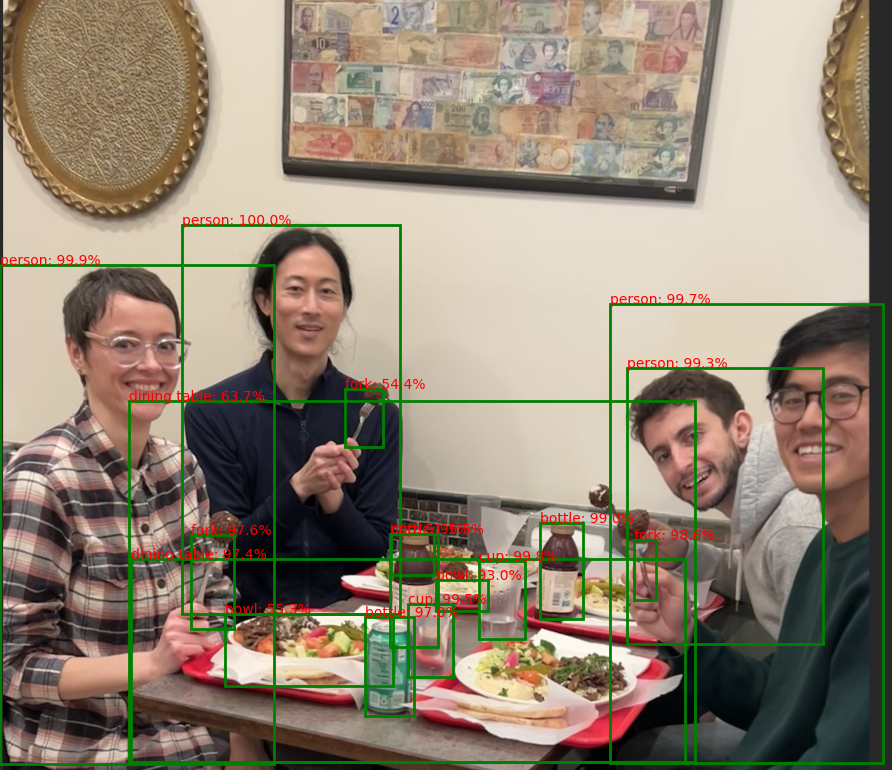

In [7]:
process_image

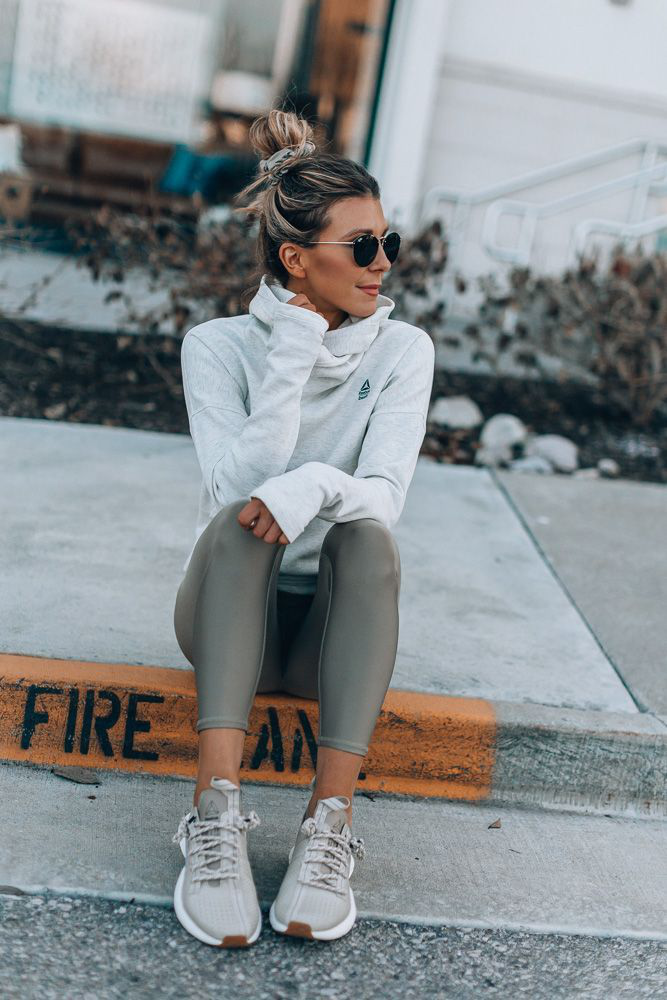

In [8]:
raw_img2 = Image.open('ad1.jpg')
raw_img2

In [9]:
output2 = od_pipe(raw_img2)


In [10]:
process_image2 = render_results_in_image(raw_img2, output2)

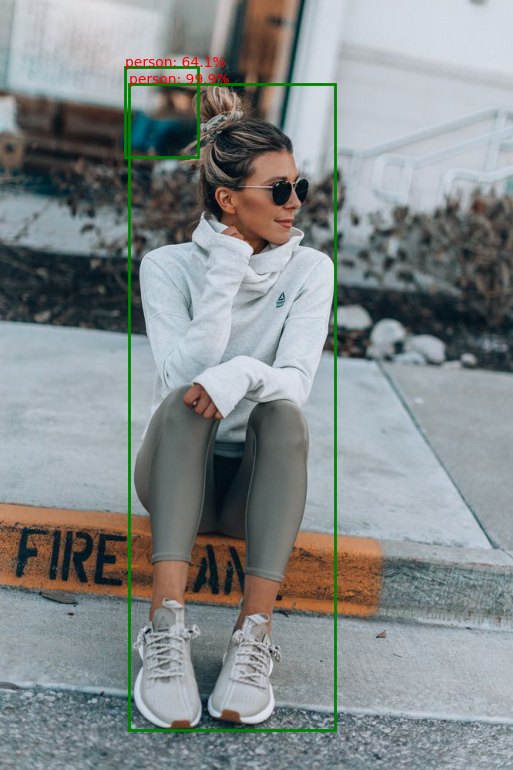

In [11]:
process_image2

In [12]:
import gradio as gr

In [13]:
def get_pipeline_prediction(pil_image):
    pipeline_out=od_pipe(pil_image)
    process_image = render_results_in_image(pil_image,pipeline_out)
    return process_image

In [14]:
demo = gr.Interface(
    fn=get_pipeline_prediction,
    inputs=gr.Image(label="Input image",
                   type="pil"),
    outputs=gr.Image(label="Output image with predicted instances",
                    type="pil")
)

In [15]:
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://f05fe3343aac797f34.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/opt/anaconda3/envs/huggingface/lib/python3.11/site-packages/gradio/queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/huggingface/lib/python3.11/site-packages/gradio/route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/huggingface/lib/python3.11/site-packages/gradio/blocks.py", line 2116, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/huggingface/lib/python3.11/site-packages/gradio/blocks.py", line 1623, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/huggingface/lib/python3.11/site-packages/anyio/to_thread.p

In [16]:
output2

[{'score': 0.6413847804069519,
  'label': 'person',
  'box': {'xmin': 162, 'ymin': 86, 'xmax': 257, 'ymax': 203}},
 {'score': 0.9990437626838684,
  'label': 'person',
  'box': {'xmin': 167, 'ymin': 108, 'xmax': 434, 'ymax': 948}}]

In [17]:
 od_pipe

In [18]:
from helper import summarize_predictions_natural_language

In [19]:
text = summarize_predictions_natural_language(output2)

In [20]:
text


'In this image, there are two persons.'

In [21]:
from transformers import pipeline
tts_pipe = pipeline(task="text-to-speech", model="kakao-enterprise/vits-ljs")

Device set to use mps:0


In [22]:
narrated_text=tts_pipe(text)

ImportError: Please install the `phonemizer` Python package to use this tokenizer.

In [ ]:
 from IPython.display import Audio as IPythonAudio
IPythonAudio(narrated_text["audio"][0],
            rate=narrated_text["sampling_rate"])